In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import preprocessing
import plotly.express as px
from sklearn.datasets import make_blobs

In [ ]:
df = pd.read_csv('/content/Wholesale customers data.csv')
n_features = df.shape[1]
print("Jumlah fitur:", n_features)
df.head

Jumlah fitur: 8


<bound method NDFrame.head of      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4  

In [ ]:
df.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
from sklearn.preprocessing import MinMaxScaler

print('Data sebelum normalisasi: ')
print(df)

scaler = MinMaxScaler()
scaler.fit(df)
dataku_ternormalisasi = scaler.transform(df)

print('Data setelah di normalisasi')
print(dataku_ternormalisasi)

Data sebelum normalisasi: 
     Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4     

In [ ]:
print(df.duplicated())
print()
print('Data duplikat: ')
print(df[df.duplicated(keep = False)])

0      False
1      False
2      False
3      False
4      False
       ...  
435    False
436    False
437    False
438    False
439    False
Length: 440, dtype: bool

Data duplikat: 
Empty DataFrame
Columns: [Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen]
Index: []


In [ ]:
missing_value = df.isnull().sum()
print('Jumlah data hilang pada setiap kolom: ')
missing_value

Jumlah data hilang pada setiap kolom: 


Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

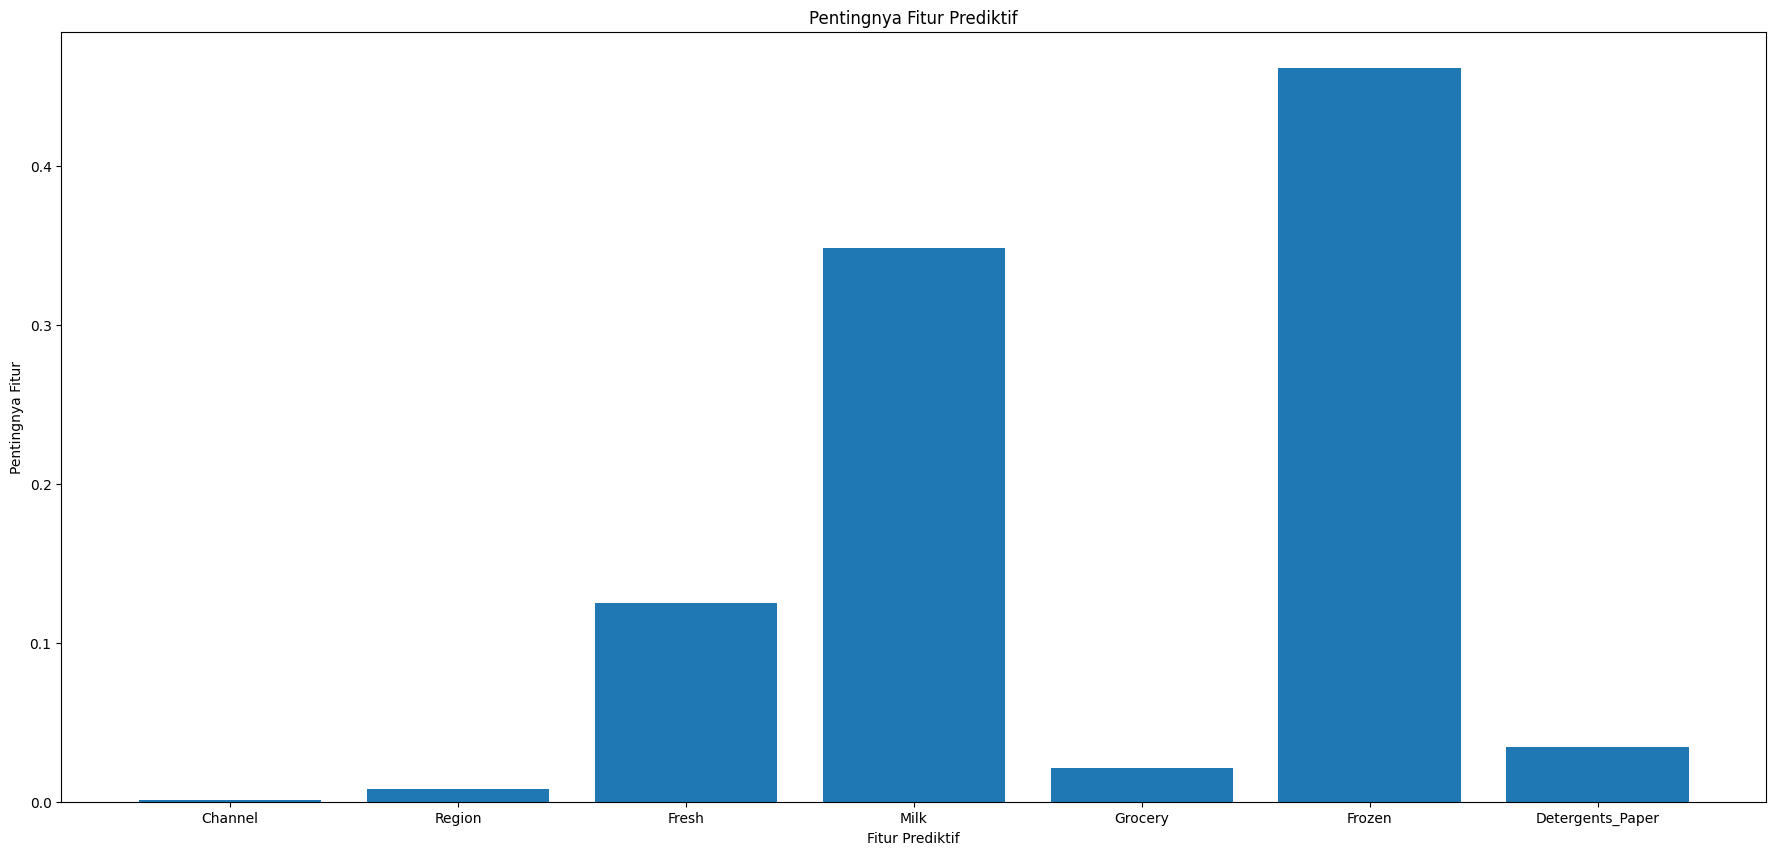

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

X = df[['Channel',	'Region',	'Fresh',	'Milk',	'Grocery',	'Frozen',	'Detergents_Paper']]
y = df['Delicassen']

model = DecisionTreeRegressor()

model.fit(X, y)

feature_importances = model.feature_importances_

plt.figure(figsize = (22, 10))
plt.bar(X.columns, feature_importances)
plt.xlabel('Fitur Prediktif')
plt.ylabel('Pentingnya Fitur')
plt.title('Pentingnya Fitur Prediktif')
plt.show()

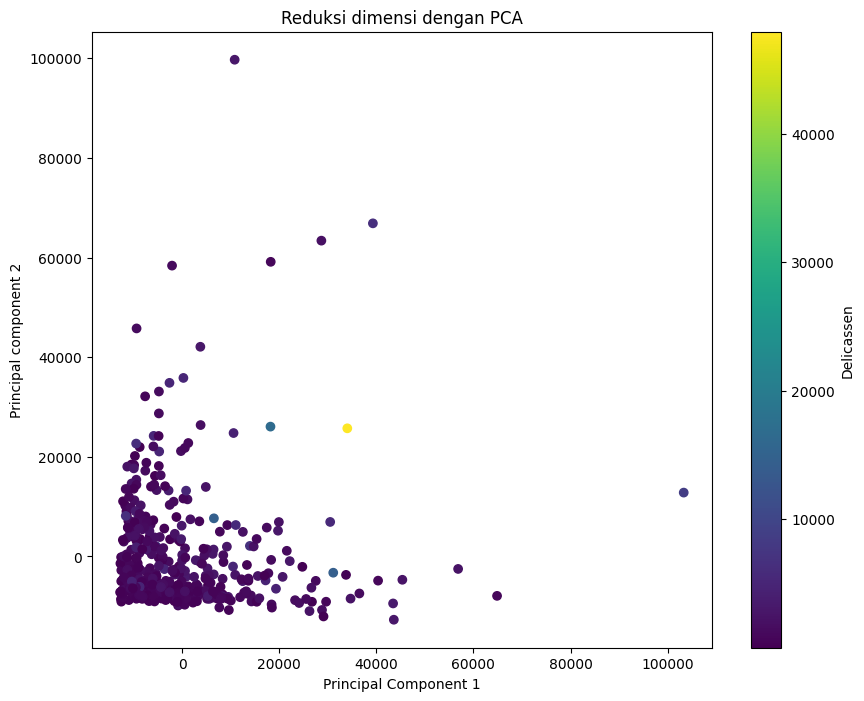

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_reduced = pca.fit_transform(X)

plt.figure(figsize = (10, 8))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal component 2')
plt.title('Reduksi dimensi dengan PCA')
plt.colorbar(label = 'Delicassen')
plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# inisialisasi
oversampler = RandomOverSampler(random_state=42)

undersampler = RandomUnderSampler(random_state=42)

# melakukan
S_resampled, k_resampled = oversampler.fit_resample(X, y)

S_resampled, k_resampled = undersampler.fit_resample(X, y)
print('Jumlah kelas setelah resampling: ')

# menggabungkan data kembali
data_resampled = pd.concat([k_resampled])
print(data_resampled)

Jumlah kelas setelah resampling: 
0          3
1          7
2          8
3         11
4         18
       ...  
398     8550
399    14351
400    14472
401    16523
402    47943
Name: Delicassen, Length: 403, dtype: int64


In [ ]:
from sklearn.cluster import KMeans
#training the K-means model on a dataset
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
y_predict= kmeans.fit_predict(df)
y_predict

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 2, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 1, 2,
       1, 2, 2, 2, 1, 2, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0,
       1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

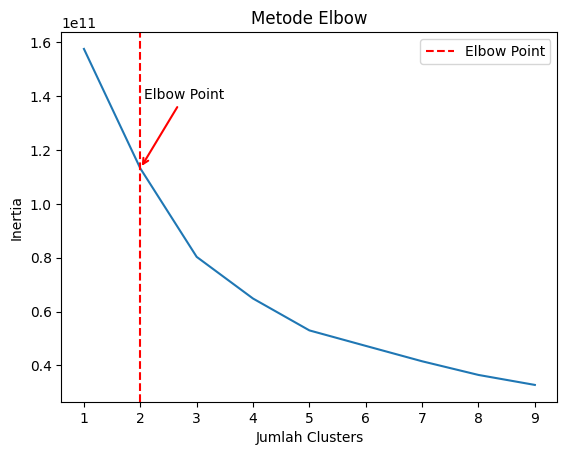

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

elbow_point = 0
for i in range(1, len(wcss)):
    if (wcss[i] - wcss[i-1]) < 10:
        elbow_point = i
        break

plt.plot(range(1, 10), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Clusters')
plt.ylabel('Inertia')

plt.annotate('Elbow Point', xy=(range(1, 10)[elbow_point], wcss[elbow_point]), xytext=(3, 50),
            textcoords='offset points', arrowprops=dict(arrowstyle='->', lw=1.5, color='red'))

plt.axvline(x=range(1, 10)[elbow_point], color='red', linestyle='--', label='Elbow Point')

plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

X, _ = make_blobs(n_samples=403, n_features=8, centers=3, random_state=0)

n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(X)
silhouette_avg = silhouette_score(X, cluster_labels)

# Print the Silhouette Score
print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg}")


Silhouette Score for 3 clusters: 0.8009264144792758


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


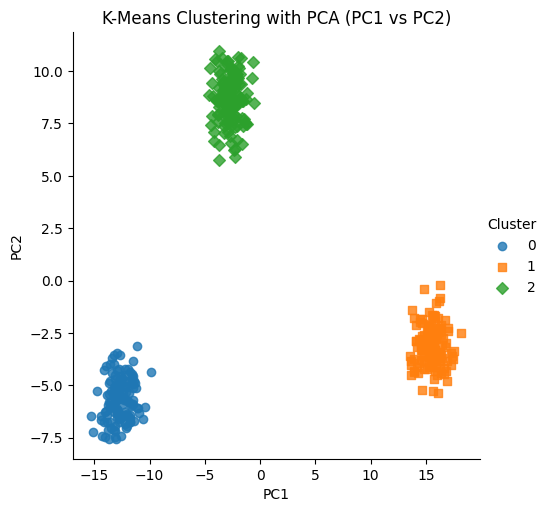

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

# Generate example data
n_samples = 403
n_features = 8
n_clusters = 3
random_state = 0

X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply K-Means clustering to the PCA-transformed data
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

# Create a DataFrame for better visualization with Seaborn
import pandas as pd
df = pd.DataFrame({'PC1': X_pca[:, 0], 'PC2': X_pca[:, 1], 'Cluster': cluster_labels})

# Create a scatter plot with Seaborn
sns.lmplot(data=df, x='PC1', y='PC2', hue='Cluster', fit_reg=False, markers=["o", "s", "D"])
plt.title('K-Means Clustering with PCA (PC1 vs PC2)')
plt.show()